In [1]:
import tensorflow as tf
tf.config.gpu.set_per_process_memory_fraction(0.3)
tf.config.gpu.set_per_process_memory_growth(True)

## Methods

In [11]:
import matplotlib.pyplot as plt
def plotter(History):
    #Training vs Validation Learning loss 
    plt.figure(figsize=(4, 4))
    plt.title("Learning curve")
    plt.plot(History.history["loss"], label="loss")
    plt.plot(History.history["val_loss"], label="val_loss")
    plt.plot( np.argmin(History.history["val_loss"]),
             np.min(History.history["val_loss"]),
             marker="x", color="r", label="best model")

    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.legend(); 

    #Train and test accuracy plot
    plt.figure(figsize=(4,4))
    plt.title("Accuracy Learning Curve")
    #plt.plot(History.history["binary_accuracy"], label="binary_accuracy")
    #plt.plot(History.history["val_binary_accuracy"], label="val_binary_accuracy")
    plt.plot(History.history["categorical_accuracy"], label="categorical_accuracy")
    plt.plot(History.history["val_categorical_accuracy"], label="val_categorical_accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(); 

In [2]:
#Data loader

import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize

def data_loader(img_w, img_h, label1, label2, data_path):
    #Creating data path
    train_data_path = os.path.join(data_path, 'train')   
    test_data_path = os.path.join(data_path, 'test')

    #Listing all file names in the path
    train_list = os.listdir(train_data_path)
    test_list = os.listdir(test_data_path)
    
    
    return get_train_test_data(train_data_path, test_data_path, train_list, test_list)
    
    

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, label1, label2)]) 

        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))

    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, label1, label2)]) 

        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))

    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):

    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)

    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)

    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)

    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]

    Train_Img = np.expand_dims(Train_Img, axis = 3)   

    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]

    Test_Img = np.expand_dims(Test_Img, axis = 3)

    return Train_Img, Test_Img, Train_Label, Test_Label

   

In [3]:
# AlexNet building the model
# AlexNet Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation, Flatten, Conv2D, Dense, MaxPooling2D, MaxPooling2D,Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam


#Model definition
def modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate):

    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
       
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))

    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=Base, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
   
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    

    model.add(Conv2D(filters=Base, kernel_size=(3,3), strides=(1,1), padding='same'))
   
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
        
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    

    model.add(Conv2D(filters=Base, kernel_size=(3,3), strides=(1,1), padding='same'))
   
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
        
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
        
    model.add(Activation('relu'))
    
    #Add Dropout
    if dropout:
        model.add(Dropout(dropoutRate))

    model.add(Dense(64))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
        
    model.add(Activation('relu'))
    
    #Add Dropout
    if dropout:
        model.add(Dropout(dropoutRate))

    model.add(Dense(1))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

In [4]:
# VGG model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


#Model definition
def modelVGG(img_ch,img_width,img_height, batchNormalization, spatial_dropout, SDRate, dropout, dropoutRate):

    model = Sequential()
    
    # Conv Block 1
    # 1.1
    model.add(Conv2D(filters=64, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #1.2
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #1.3    
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
     # Conv Block 2
        
    # 2.1
    model.add(Conv2D(filters=128, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #2.2
    model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Conv Block 3
    
     # 3.1
    model.add(Conv2D(filters=256, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #3.2
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #3.3    
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Conv Block 4
    
    # 4.1
    model.add(Conv2D(filters=512, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #4.2
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #4.3    
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Conv Block 5
    
    # 5.1
    model.add(Conv2D(filters=512, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #5.2
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #5.3    
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Dense Block
    
    model.add(Flatten())
    
    model.add(Dense(4096))
    model.add(Activation('relu'))
    
    #Add Dropout
    if dropout:
        model.add(Dropout(dropoutRate))
        
    model.add(Dense(4096))
    model.add(Activation('relu'))
    
    #Add Dropout
    if dropout:
        model.add(Dropout(dropoutRate))
     
    #Output
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()
    return model


In [5]:
# VGG2 model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D


#Model definition
def modelVGG2(img_ch,img_width,img_height, batchNormalization, spatial_dropout, SDRate, dropout, dropoutRate):

    model = Sequential()
    
    # Conv Block 1
    # 1.1
    model.add(Conv2D(filters=64, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #1.2
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #1.3    
    model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
     # Conv Block 2
        
    # 2.1
    model.add(Conv2D(filters=128, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #2.2
    model.add(Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Conv Block 3
    
     # 3.1
    model.add(Conv2D(filters=256, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #3.2
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #3.3    
    model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Conv Block 4
    
    # 4.1
    model.add(Conv2D(filters=512, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #4.2
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #4.3    
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Conv Block 5
    
    # 5.1
    model.add(Conv2D(filters=512, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
     #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
    
    #5.2
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    #5.3    
    model.add(Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), padding='same'))
    
    #Add batch Normalization
    if batchNormalization:
        model.add(BatchNormalization(axis=-1))
    
    model.add(Activation('relu'))
    
    #Add spatial Dropout
    if spatial_dropout:
        model.add(SpatialDropout2D(SDRate))
        
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    #Dense Block
    
    model.add(Flatten())
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    
    #Add Dropout
    if dropout:
        model.add(Dropout(dropoutRate))
    
    model.add(Dense(64))
    model.add(Activation('relu'))
    
    #Add Dropout
    if dropout:
        model.add(Dropout(dropoutRate))
        
    model.add(Dense(64))
    model.add(Activation('relu'))
    
    #Add Dropout
    if dropout:
        model.add(Dropout(dropoutRate))
     
    #Output
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()
    return model


In [6]:
# Execute a model
def execute(model, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test):
    
    #Compile the model
    model.compile(loss=loss_type,
                  optimizer = optim(lr=LR),
                  metrics=[acc_metric])
    
    History = model.fit(Input, Target, epochs = epoch, batch_size= batch_s, verbose=1,
                     validation_data=(x_test, y_test))
    return History

In [7]:
# Load data
#init image dimensions
img_w, img_h = 128, 128                               
data_path = '/Lab1/Skin/'          
label1 = 'Mel'    
label2 = 'Nev'

x_train, x_test, y_train, y_test = data_loader(img_w, img_h, label1, label1, data_path)


/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/1000  of train images
Reading: 200/1000  of train images
Reading: 400/1000  of train images
Reading: 600/1000  of train images
Reading: 800/1000  of train images
Reading: 0/200 of test images
Reading: 100/200 of test images


## Tasks

In [9]:
## Task 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 8)       80        
_________________________________________________________________
activation (Activation)      (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 8)         5

Epoch 33/50
1000/1000 [==============================] - 1s 883us/sample - loss: 0.4131 - binary_accuracy: 0.8170 - val_loss: 0.4751 - val_binary_accuracy: 0.8200
Epoch 34/50
1000/1000 [==============================] - 1s 851us/sample - loss: 0.4168 - binary_accuracy: 0.8120 - val_loss: 0.4687 - val_binary_accuracy: 0.8150
Epoch 35/50
1000/1000 [==============================] - 1s 884us/sample - loss: 0.4047 - binary_accuracy: 0.8200 - val_loss: 0.4874 - val_binary_accuracy: 0.8150
Epoch 36/50
1000/1000 [==============================] - 1s 880us/sample - loss: 0.4017 - binary_accuracy: 0.8300 - val_loss: 0.4814 - val_binary_accuracy: 0.8050
Epoch 37/50
1000/1000 [==============================] - 1s 878us/sample - loss: 0.4060 - binary_accuracy: 0.8310 - val_loss: 0.4942 - val_binary_accuracy: 0.8000
Epoch 38/50
1000/1000 [==============================] - 1s 880us/sample - loss: 0.4112 - binary_accuracy: 0.8250 - val_loss: 0.4741 - val_binary_accuracy: 0.8100
Epoch 39/50
1000/1000 

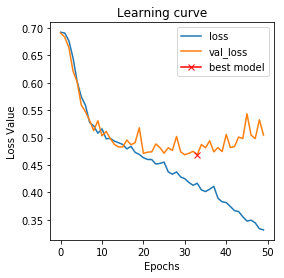

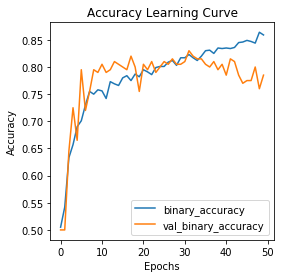

In [10]:
# Task 1a

img_width = 128
img_height = 128
img_ch = 1
Base = 8
batchNormalization = False
dropout = False
dropoutRate = 0
spatial_dropout = False
SDRate = 0
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.0001
acc_metric = 'binary_accuracy'
epoch = 50
batch_s = 8

#Model call
model_without_BN = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

#Model execution
History_without_BN = execute(model_without_BN, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_without_BN)

In [11]:
# Clear Variables

del model_without_BN, History_without_BN

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
batch_normalization_v2 (Batc (None, 128, 128, 8)       32        
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 8)         584       
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 64, 64, 8)         32        
_________________________________________________________________
activation_9 (Activation)    (None, 64, 64, 8)        

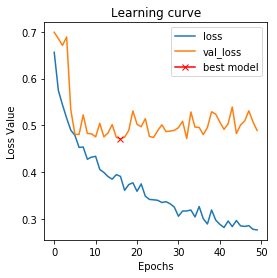

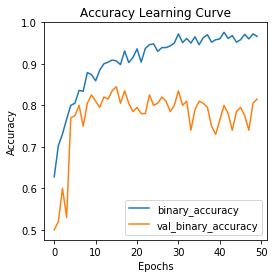

In [12]:
# Task 1b:

img_width = 128
img_height = 128
img_ch = 1
Base = 8
batchNormalization = True
dropout = False
dropoutRate = 0
spatial_dropout = False
SDRate = 0
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.0001
acc_metric = 'binary_accuracy'
epoch = 50
batch_s = 8

#Model call
model_with_BN = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

#Model execution
History_with_BN = execute(model_with_BN, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_with_BN)

In [13]:
# Clear Variables

del model_with_BN, History_with_BN

In [14]:
# Task 1b: The final training accuracy when adding batch normalization is: 1.
# The training accuracy from task 1a is reached at epoch number 8.
# The effect of the batch normalization layers is stabilize the learning process and reducing the number of training epochs required. It is very useful for deep architectures.

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_16 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
activation_17 (Activation)   (None, 64, 64, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 8)        

Epoch 33/80
1000/1000 [==============================] - 1s 890us/sample - loss: 0.6321 - binary_accuracy: 0.7040 - val_loss: 0.6364 - val_binary_accuracy: 0.7300
Epoch 34/80
1000/1000 [==============================] - 1s 913us/sample - loss: 0.6278 - binary_accuracy: 0.7080 - val_loss: 0.6331 - val_binary_accuracy: 0.7000
Epoch 35/80
1000/1000 [==============================] - 1s 896us/sample - loss: 0.6245 - binary_accuracy: 0.7200 - val_loss: 0.6297 - val_binary_accuracy: 0.7050
Epoch 36/80
1000/1000 [==============================] - 1s 890us/sample - loss: 0.6214 - binary_accuracy: 0.7200 - val_loss: 0.6245 - val_binary_accuracy: 0.7250
Epoch 37/80
1000/1000 [==============================] - 1s 870us/sample - loss: 0.6174 - binary_accuracy: 0.7090 - val_loss: 0.6224 - val_binary_accuracy: 0.6950
Epoch 38/80
1000/1000 [==============================] - 1s 880us/sample - loss: 0.6141 - binary_accuracy: 0.7270 - val_loss: 0.6179 - val_binary_accuracy: 0.7150
Epoch 39/80
1000/1000 

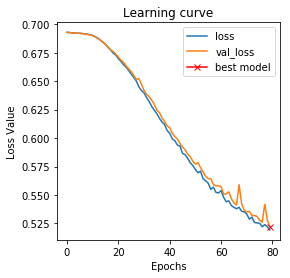

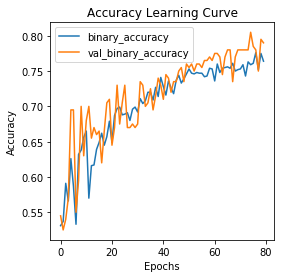

In [15]:
# Task 1c

# Model without batch normalization
img_width = 128
img_height = 128
img_ch = 1
Base = 8
batchNormalization = False
dropout = False
dropoutRate = 0
spatial_dropout = False 
SDRate = 0
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 80
batch_s = 8

#Model call
model_1c_NoBN = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

#Model execution
History_1c_NoBN = execute(model_1c_NoBN, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_1c_NoBN)

In [16]:
# Clear Variables

del model_1c_NoBN, History_1c_NoBN

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
batch_normalization_v2_8 (Ba (None, 128, 128, 8)       32        
_________________________________________________________________
activation_24 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
batch_normalization_v2_9 (Ba (None, 64, 64, 8)         32        
_________________________________________________________________
activation_25 (Activation)   (None, 64, 64, 8)        

Epoch 77/80
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.4031 - binary_accuracy: 0.9010 - val_loss: 0.5080 - val_binary_accuracy: 0.7850
Epoch 78/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4108 - binary_accuracy: 0.8760 - val_loss: 0.5093 - val_binary_accuracy: 0.7750
Epoch 79/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4037 - binary_accuracy: 0.8940 - val_loss: 0.5100 - val_binary_accuracy: 0.7700
Epoch 80/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.4077 - binary_accuracy: 0.8830 - val_loss: 0.5058 - val_binary_accuracy: 0.7850


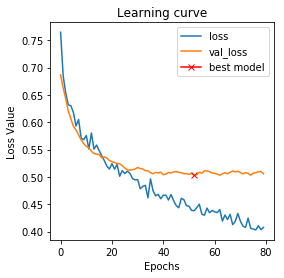

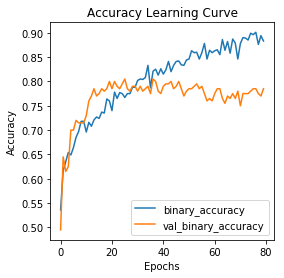

In [17]:
# Model with batch normalization
img_width = 128
img_height = 128
img_ch = 1
Base = 8
batchNormalization = True
dropout = False
dropoutRate = 0
spatial_dropout = False 
SDRate = 0
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 80
batch_s = 8

#Model call
model_1c_BN = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

#Model execution
History_1c_BN = execute(model_1c_BN, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_1c_BN)

In [18]:
# Clear Variables

del model_1c_BN, History_1c_BN

In [ ]:
# Task 2 - Add dropout layer
#With BN

img_width = 128
img_height = 128
img_ch = 1
Base = 8
batchNormalization = True
dropout = True
dropoutRate = 0.4
spatial_dropout = False
SDRate = 0
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 80
batch_s = 8

#Model call
model_2BN = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate , spatial_dropout, SDRate)

#Model execution
History_2BN = execute(model_2BN, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_2BN)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
batch_normalization_v2_16 (B (None, 128, 128, 8)       32        
_________________________________________________________________
activation_32 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 64, 64, 8)         584       
_________________________________________________________________
batch_normalization_v2_17 (B (None, 64, 64, 8)         32        
_________________________________________________________________
activation_33 (Activation)   (None, 64, 64, 8)        

Epoch 25/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5813 - binary_accuracy: 0.6940 - val_loss: 0.5621 - val_binary_accuracy: 0.7650
Epoch 26/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5844 - binary_accuracy: 0.6930 - val_loss: 0.5585 - val_binary_accuracy: 0.7650
Epoch 27/80
1000/1000 [==============================] - 1s 1ms/sample - loss: 0.5694 - binary_accuracy: 0.7110 - val_loss: 0.5567 - val_binary_accuracy: 0.7750
Epoch 28/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5882 - binary_accuracy: 0.6980 - val_loss: 0.5539 - val_binary_accuracy: 0.7450
Epoch 29/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5598 - binary_accuracy: 0.7240 - val_loss: 0.5530 - val_binary_accuracy: 0.7500
Epoch 30/80
1000/1000 [==============================] - 2s 2ms/sample - loss: 0.5719 - binary_accuracy: 0.7140 - val_loss: 0.5551 - val_binary_accuracy: 0.7750
Epoch 31/80
1000/1000 [===========

In [ ]:
# Clear Variables

del model_2BN, History_2BN

In [ ]:
#Without BN

img_width = 128
img_height = 128
img_ch = 1
Base = 8
batchNormalization = False
dropout = True
dropoutRate = 0.4
spatial_dropout = False
SDRate = 0.1
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 80
batch_s = 8

#Model call
model_2NotBN = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

#Model execution
History_2NotBN = execute(model_2NotBN, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_2NotBN)


In [ ]:
# clear variables

del model_2NotBN, History_2NotBN

In [ ]:
# Task 3
# Model with dropout
img_width = 128
img_height = 128
img_ch = 1
Base = 64
batchNormalization = False
dropout = True
dropoutRate = 0.4
spatial_dropout = True
SDRate = 0.1
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 150
batch_s = 8

#Model call
model_3_dropout = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

#Model execution
History_3_dropout = execute(model_3_dropout, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_3_dropout)

In [ ]:
# clear variables

del model_3_Dropout, History_3_Dropout

In [ ]:
# Model without dropout
img_width = 128
img_height = 128
img_ch = 1
Base = 64
batchNormalization = False
dropout = False
dropoutRate = 0.4
spatial_dropout = False
SDRate = 0.1
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 150
batch_s = 8

#Model call
model_3_NoDropout = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

#Model execution
History_3_NoDropout = execute(model_3_NoDropout, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)

#Obtain plots
plotter(History_3_NoDropout)

In [ ]:
# clear variables

del model_3_NoDropout, History_3_NoDropout

In [ ]:
# Task 4

# VGG tests for skin images
img_width = 128
img_height = 128
img_ch = 1
batchNormalization = True
dropout = True
dropoutRate = 0.55
spatial_dropout = False
SDRate = 0.001
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 20
batch_s = 8

VGG_skin = modelVGG(img_ch,img_width,img_height, batchNormalization, spatial_dropout, SDRate, dropout, dropoutRate)
History_VGG_skin = execute(VGG_skin, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)
plotter(History_VGG_skin)

In [ ]:
# clear variables

del VGG_skin, History_VGG_skin

In [ ]:
# Load Bone images

# Load data

img_w, img_h = 128, 128                               
data_path = '/Lab1/Bone/'           
label1 = 'AFF'    
label2 = 'NFF'

x_train, x_test, y_train, y_test = data_loader(img_w, img_h, label1, label1, data_path)

In [ ]:
# VGG for bone images

img_width = 128
img_height = 128
img_ch = 1
batchNormalization = True
dropout = True
dropoutRate = 0.4
spatial_dropout = False
SDRate = 0.05
Input = x_train
Test_Input = x_test
Target = y_train
Test_Target = y_test
loss_type = 'binary_crossentropy'
optim = Adam
LR = 0.00001
acc_metric = 'binary_accuracy'
epoch = 20
batch_s = 8

VGG_bone = modelVGG(img_ch,img_width,img_height, batchNormalization, spatial_dropout, SDRate, dropout, dropoutRate)
History_VGG_bone = execute(VGG_bone, Input, Target ,loss_type, optim, LR, acc_metric,epoch, batch_s, x_test,y_test)
plotter(History_VGG_bone)


In [ ]:
# clear variables

del VGG_bone, History_VGG_bone

### Data Augmentation

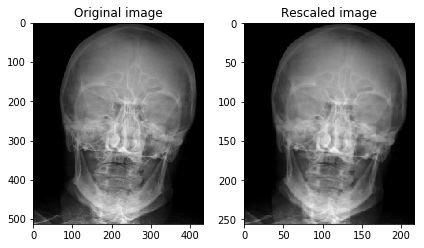

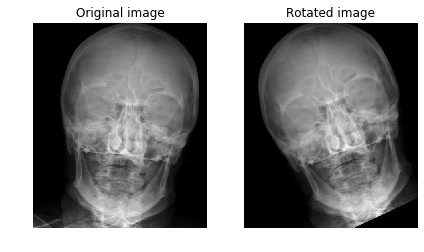

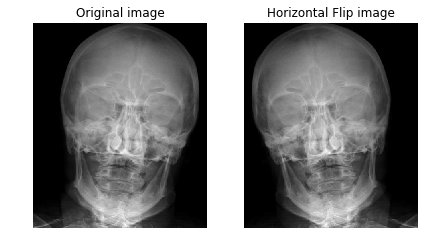

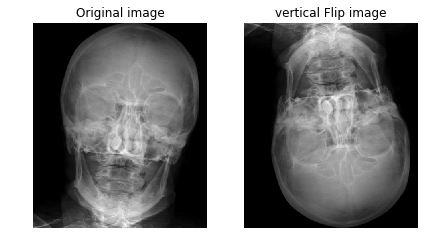

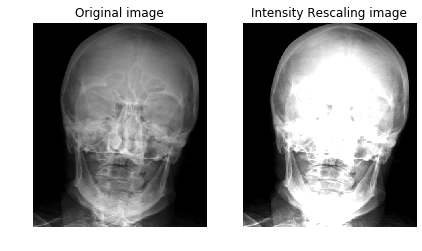

In [16]:
# Task5a
import numpy as np
from skimage.io import imread
from skimage.transform import rescale
from skimage.transform import rotate
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Sample = '/Lab1/X_ray/train/C4_4662.jpg'
Img = imread(Sample)
row, col = Img.shape

def show_paired(Original, Transform, Operation):
    fig, axes = plt.subplots(nrows=1, ncols=2)
    ax = axes.ravel()
    ax[0].imshow(Original, cmap='gray')
    ax[0].set_title("Original image")

    ax[1].imshow(Transform, cmap='gray')
    ax[1].set_title(Operation + " image")
    if Operation == "Rescaled":
        ax[0].set_xlim(0, col)
        ax[0].set_ylim(row, 0)
    else:        
        ax[0].axis('off')
        ax[1].axis('off')
    plt.tight_layout()

# Scaling
scale_factor = 0.5
image_rescaled = rescale(Img, scale_factor)
show_paired(Img, image_rescaled, "Rescaled")

# Roation
Angle = 25
image_rotated = rotate(Img, Angle)
show_paired(Img, image_rotated, "Rotated")

# Horizontal Flip
horizontal_flip = Img[:, ::-1]
show_paired(Img, horizontal_flip, 'Horizontal Flip')

# Vertical Flip
vertical_flip = Img[::-1, :]
show_paired(Img, vertical_flip, 'vertical Flip')


# Intensity rescaling
Min_Per, Max_Per = 3, 75
min_val, max_val = np.percentile(Img, (Min_Per, Max_Per))

better_contrast = exposure.rescale_intensity(Img, in_range=(min_val, max_val))
show_paired(Img, better_contrast, 'Intensity Rescaling')

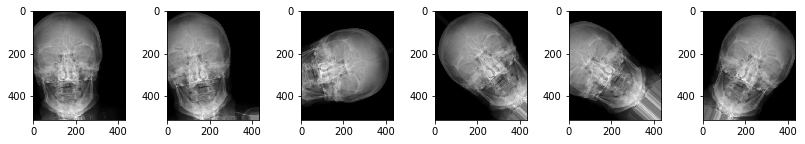

In [17]:
# Task 5b
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

Sample = '/Lab1/X_ray/train/C4_4662.jpg'
Img = imread(Sample)
Img = np.expand_dims(Img, axis = 2) 
Img = np.expand_dims(Img, axis = 0)


count = 5
MyGen = ImageDataGenerator(featurewise_center = True, rotation_range = 90,
                         width_shift_range = 0.2,
                         horizontal_flip = True)


fix, ax = plt.subplots(1,count+1, figsize=(14,2))
images_flow = MyGen.flow(Img, batch_size=1)
for i, new_images in enumerate(images_flow):
    new_image = array_to_img(new_images[0], scale=True)
    ax[i].imshow(new_image,cmap="gray")
    if i >= count:
        break 

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 128, 128, 64)      256       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 64, 64, 64)        256       
_______________________________________

32/32 [==============================] - 4s 125ms/step - loss: 0.4959 - binary_accuracy: 0.7930 - val_loss: 0.4983 - val_binary_accuracy: 0.8200
Epoch 78/80
32/32 [==============================] - 4s 129ms/step - loss: 0.5077 - binary_accuracy: 0.7780 - val_loss: 0.5097 - val_binary_accuracy: 0.7950
Epoch 79/80
32/32 [==============================] - 4s 127ms/step - loss: 0.5066 - binary_accuracy: 0.7820 - val_loss: 0.5019 - val_binary_accuracy: 0.7850
Epoch 80/80
32/32 [==============================] - 4s 128ms/step - loss: 0.4913 - binary_accuracy: 0.8060 - val_loss: 0.5041 - val_binary_accuracy: 0.7900


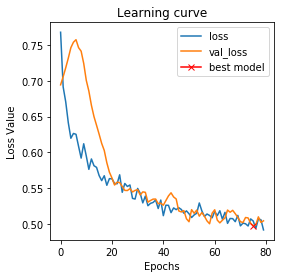

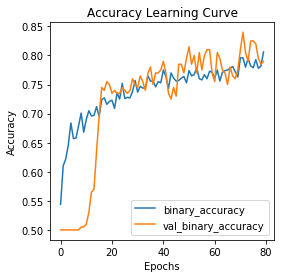

In [11]:
# Task 6
# Import required libraries …
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# Data and model parameters
# image generator parameters
rotation_range = 10
width_shift = 0.1
height_shift_range = 0.1,
rescale = 1./255
horizontal_flip = True

# model parameters
img_ch = 1
img_width = 128
img_height = 128
batchNormalization = True
dropout = True
dropoutRate = 0.4
spatial_dropout = False
SDRate = 0
Base = 64
LR = 0.00001
b_size = 8
TRAIN_DIR = '/Lab1/Lab2/Skin/train/' 
VAL_DIR = '/Lab1/Lab2/Skin/validation/'

def DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR):
    
    #Train data
    train_datagen = ImageDataGenerator(rotation_range = rotation_range, width_shift_range = width_shift, height_shift_range=height_shift_range,
                                       horizontal_flip = horizontal_flip, rescale = rescale)
    train_generator = train_datagen.flow_from_directory(TRAIN_DIR,target_size=(128, 128), color_mode="grayscale",class_mode='binary')
    
    #Val data
    val_datagen = ImageDataGenerator(rescale = rescale)
    val_generator = val_datagen.flow_from_directory(VAL_DIR,target_size=(128, 128), color_mode="grayscale",class_mode='binary')
    
    
    return train_generator, val_generator 

train_generator, val_generator = DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR)

model = modelAlexNet(img_ch, img_width, img_height, Base, batchNormalization, dropout, dropoutRate, spatial_dropout, SDRate)

model.compile(loss='binary_crossentropy',optimizer = Adam(lr=LR), metrics=['binary_accuracy'])

History = model.fit_generator( train_generator,  epochs=80, validation_data=val_generator)
    
plotter(History)

In [ ]:
# Task 7

#Skin images
# Import required libraries …
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation, Flatten, Conv2D, Dense, MaxPooling2D, MaxPooling2D,Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# Data and model parameters
# image generator parameters
rotation_range = 10
width_shift = 0.1
height_shift_range = 0.1,
rescale = 1./255
horizontal_flip = True

# model parameters
img_ch = 1
img_width = 128
img_height = 128
batchNormalization = True
dropout = True
dropoutRate = 0.4
spatial_dropout = False
SDRate = 0
Base = 64
LR = 0.00001
b_size = 8
TRAIN_DIR = '/Lab1/Lab2/Skin/train/' 
VAL_DIR = '/Lab1/Lab2/Skin/validation/'

def DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR):
    
    #Train data
    train_datagen = ImageDataGenerator(rotation_range = rotation_range, width_shift_range = width_shift, height_shift_range=height_shift_range,
                                       horizontal_flip = horizontal_flip, rescale = rescale)
    train_generator = train_datagen.flow_from_directory(TRAIN_DIR,target_size=(128, 128), color_mode="grayscale",class_mode='binary')
    
    #Val data
    val_datagen = ImageDataGenerator(rescale = rescale)
    val_generator = val_datagen.flow_from_directory(VAL_DIR,target_size=(128, 128), color_mode="grayscale",class_mode='binary')
    
    
    return train_generator, val_generator 

train_generator, val_generator = DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR)

model = modelVGG2(img_ch,img_width,img_height, batchNormalization, spatial_dropout, SDRate, dropout, dropoutRate)

model.compile(loss='binary_crossentropy',optimizer = Adam(lr=LR), metrics=['binary_accuracy'])

History = model.fit_generator( train_generator,  epochs=80, validation_data=val_generator)
    
plotter(History)

In [20]:
#Bone images
# Import required libraries …
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation, Flatten, Conv2D, Dense, MaxPooling2D, MaxPooling2D,Dropout, BatchNormalization, SpatialDropout2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam

# Data and model parameters
# image generator parameters
rotation_range = 10
width_shift = 0.1
height_shift_range = 0.1,
rescale = 1./255
horizontal_flip = True

# model parameters
img_ch = 1
img_width = 128
img_height = 128
batchNormalization = True
dropout = True
dropoutRate = 0.4
spatial_dropout = False
SDRate = 0
Base = 64
LR = 0.00001
b_size = 8
TRAIN_DIR = '/Lab1/Lab2/Bone/train/' 
VAL_DIR = '/Lab1/Lab2/Bone/validation/'

def DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR):
    
    #Train data
    train_datagen = ImageDataGenerator(rotation_range = rotation_range, width_shift_range = width_shift, height_shift_range=height_shift_range,
                                       horizontal_flip = horizontal_flip, rescale = rescale)
    train_generator = train_datagen.flow_from_directory(TRAIN_DIR,target_size=(128, 128), color_mode="grayscale",class_mode='binary')
    
    #Val data
    val_datagen = ImageDataGenerator(rescale = rescale)
    val_generator = val_datagen.flow_from_directory(VAL_DIR,target_size=(128, 128), color_mode="grayscale",class_mode='binary')
    
    
    return train_generator, val_generator 

train_generator, val_generator = DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR)

model = modelVGG2(img_ch,img_width,img_height, batchNormalization, spatial_dropout, SDRate, dropout, dropoutRate)

model.compile(loss='binary_crossentropy',optimizer = Adam(lr=LR), metrics=['binary_accuracy'])

History = model.fit_generator( train_generator,  epochs=80, validation_data=val_generator)
    
plotter(History)

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 128, 128, 64)      640       
_________________________________________________________________
batch_normalization_v2_8 (Ba (None, 128, 128, 64)      256       
_________________________________________________________________
activation_8 (Activation)    (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
batch_normalization_v2_9 (Ba (None, 128, 128, 64)      256       
_________________________________________________________________
activation_9 (Activation)    (None, 128, 128, 64)      0         
______________________________________

35/35 [==============================] - 72s 2s/step - loss: 0.7866 - binary_accuracy: 0.5504 - val_loss: 0.6932 - val_binary_accuracy: 0.5000
Epoch 2/80
35/35 [==============================] - 64s 2s/step - loss: 0.6973 - binary_accuracy: 0.5962 - val_loss: 0.6947 - val_binary_accuracy: 0.5000
Epoch 3/80
35/35 [==============================] - 64s 2s/step - loss: 0.6628 - binary_accuracy: 0.6151 - val_loss: 0.7036 - val_binary_accuracy: 0.5000
Epoch 4/80
35/35 [==============================] - 64s 2s/step - loss: 0.6630 - binary_accuracy: 0.6070 - val_loss: 0.7186 - val_binary_accuracy: 0.5000
Epoch 5/80
35/35 [==============================] - 64s 2s/step - loss: 0.6164 - binary_accuracy: 0.6313 - val_loss: 0.7484 - val_binary_accuracy: 0.5000
Epoch 6/80
35/35 [==============================] - 64s 2s/step - loss: 0.6109 - binary_accuracy: 0.6331 - val_loss: 0.7788 - val_binary_accuracy: 0.5000
Epoch 7/80
35/35 [==============================] - 64s 2s/step - loss: 0.5928 - binary

KeyboardInterrupt: 

In [8]:
# Task 8
import os
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Flatten, Dense, Dropout, ZeroPadding2D
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras import applications
import numpy as np


def get_length(Path, Pattern):
    Length =  len(os.listdir(os.path.join(Path, Pattern)))
    return Length

def VGG_16(weights_path=None):
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1000, activation='softmax'))
    model.summary()
    


def VGG_transferLearning(label1, label2,train_data_dir,validation_dir,img_width, img_height, LR, base):
    
    # number of data for each class
    Len_C1_Train = get_length(train_data_dir,label1)
    Len_C2_Train = get_length(train_data_dir,label2)
    Len_C1_Val = get_length(validation_dir,label1)
    Len_C2_Val = get_length(validation_dir,label2)

    # loading the pre-trained model
    model = applications.VGG16(include_top=False, weights='imagenet',input_shape = (img_width, img_height, 3))
   
    # Feature extraction from pretrained VGG (training data)
    datagen = ImageDataGenerator(rescale=1. / 255)

    train_generator = datagen.flow_from_directory(
            train_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode=None,
            shuffle=False)

    features_train = model.predict_generator(
            train_generator,
            (Len_C1_Train+Len_C2_Train) // batch_size, max_queue_size=1)


    # To DO: Feature extraction from pretrained VGG (validation data)
    datagen = ImageDataGenerator(rescale=1. / 255)

    validation_generator = datagen.flow_from_directory(
            validation_data_dir,
            target_size=(img_width, img_height),
            batch_size=batch_size,
            class_mode=None,
            shuffle=False)

    features_validation = model.predict_generator(
            validation_generator,
            (Len_C1_Val+Len_C2_Val) // batch_size, max_queue_size=1)



    # training a small MLP with extracted features from the pre-trained model
    train_data = features_train
    train_labels = np.array([0] * int(Len_C1_Train) + [1] * int(Len_C2_Train))
    #print("train data shape: ", train_data.shape,", train labels shape: ", train_labels.shape)

    validation_data = features_validation
    validation_labels = np.array([0] * int(Len_C1_Val) + [1] * int(Len_C2_Val))
    #print("validation shape: ", validation_data.shape,", validation labels shape: ", validation_labels.shape)


     # TODO: Building the MLP model    
    
    model = Sequential()
    model.add(Flatten(input_shape = (train_data.shape[1],train_data.shape[2],train_data.shape[3])))
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer = Adam(lr=LR), metrics=['binary_accuracy'])
    History = model.fit(x=train_data, y=train_labels,  epochs=80, validation_data=(validation_data,validation_labels))
    plotter(History)
    
    return 


In [ ]:
# Task 9


# parameters for Bone images
train_data_dir = '/Lab1/Lab2/Bone/train/'
validation_data_dir = '/Lab1/Lab2/Bone/validation/'
img_width, img_height = 224,224
epochs = 150
batch_size = 8
LR = 0.00001
label1 = 'AFF'
label2 = 'NFF'
base = 8

VGG_transferLearning(label1, label2,train_data_dir,validation_data_dir,img_width, img_height, LR, base)


Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Train on 1000 samples, validate on 200 samples
Epoch 1/80
1000/1000 [==============================] - 1s 943us/sample - loss: 0.5851 - binary_accuracy: 0.6860 - val_loss: 0.4437 - val_binary_accuracy: 0.7950
Epoch 2/80
1000/1000 [==============================] - 0s 484us/sample - loss: 0.4398 - binary_accuracy: 0.7950 - val_loss: 0.3926 - val_binary_accuracy: 0.8700
Epoch 3/80
1000/1000 [==============================] - 0s 490us/sample - loss: 0.4295 - binary_accuracy: 0.8160 - val_loss: 0.3773 - val_binary_accuracy: 0.8650
Epoch 4/80
1000/1000 [==============================] - 0s 485us/sample - loss: 0.4049 - binary_accuracy: 0.8210 - val_loss: 0.3592 - val_binary_accuracy: 0.8550
Epoch 5/80
1000/1000 [==============================] - 0s 481us/sample - loss: 0.3884 - binary_accuracy: 0.8180 - val_loss: 0.3573 - val_binary_accuracy: 0.8600
Epoch 6/80
1000/1000 [==============================] - 0s 4

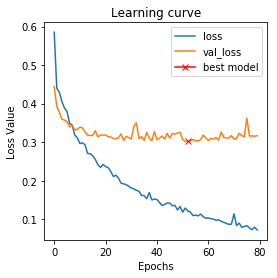

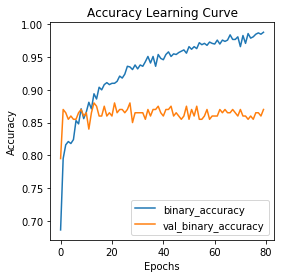

In [9]:
# parameters for Skin images
train_data_dir = '/Lab1/Lab2/Skin/train/'
validation_data_dir = '/Lab1/Lab2/Skin/validation/'
img_width, img_height = 224,224
epochs = 150
batch_size = 8
LR = 0.00001
label1 = 'Mel'    
label2 = 'Nevi'
base = 8

VGG_transferLearning(label1, label2,train_data_dir,validation_data_dir,img_width, img_height, LR, base)


### Data Visualization

Found 1112 images belonging to 2 classes.
Found 96 images belonging to 2 classes.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 128)       0         
______________________________________

Epoch 80/80
35/35 [==============================] - 65s 2s/step - loss: 0.0500 - categorical_accuracy: 0.9802 - val_loss: 0.0260 - val_categorical_accuracy: 0.9792


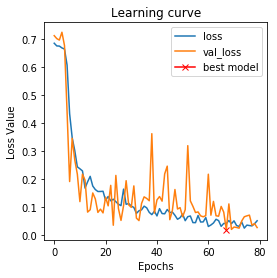

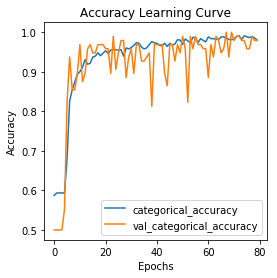

In [12]:
# Task 10 network
def model(input_shape):
    model = Sequential([
    Conv2D(64, (3, 3), input_shape=input_shape, padding='same', activation='relu'),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same'),
    Conv2D(512, (3, 3), activation='relu', padding='same', name = "Last_ConvLayer"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(4096, activation='relu'),
    Dense(2, activation='softmax')
    ])

    model.summary()
    return model

#Model parameters

TRAIN_DIR= '/Lab1/Lab2/Bone/train/'
VAL_DIR = '/Lab1/Lab2/Bone/validation/'
img_width, img_height = 224,224
epochs = 150
batch_size = 8
LR = 0.00001

#Data augmentation
def DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR):
    
    #Train data
    train_datagen = ImageDataGenerator(rotation_range = rotation_range, width_shift_range = width_shift, height_shift_range=height_shift_range,
                                       horizontal_flip = horizontal_flip, rescale = rescale)
    train_generator = train_datagen.flow_from_directory(TRAIN_DIR,target_size=(224, 224), color_mode="grayscale",class_mode='categorical')
    
    #Val data
    val_datagen = ImageDataGenerator(rescale = rescale)
    val_generator = val_datagen.flow_from_directory(VAL_DIR,target_size=(224, 224), color_mode="grayscale",class_mode='categorical')
    
    
    return train_generator, val_generator 

# image generator parameters
rotation_range = 10
width_shift = 0.1
height_shift_range = 0.1,
rescale = 1./255
horizontal_flip = True


train_generator, val_generator = DataAugmentation(rotation_range,width_shift,height_shift_range,rescale,horizontal_flip, TRAIN_DIR, VAL_DIR)

model = model((img_width, img_height,1))
model.compile(loss='categorical_crossentropy',optimizer = Adam(lr=LR), metrics=['categorical_accuracy'])
History = model.fit_generator(train_generator,  epochs=80, validation_data=val_generator)
plotter(History)

In [22]:
# Task 10
from tensorflow.keras import backend as K
import tensorflow as tf
#tf.compat.v1.enable_eager_execution()
from skimage.io import imread
from skimage.transform import resize
#import cv2

Sample = '/Lab1/Lab2/Bone/train/AFF/14.jpg'
Img = imread(Sample)
Img = Img[:,:,0]
Img = Img/255
Img = resize(Img, (img_height, img_width), anti_aliasing = True).astype('float32')
Img = np.expand_dims(Img, axis = 2) 
Img = np.expand_dims(Img, axis = 0)
preds = model.predict(Img)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("Last_ConvLayer")

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([Img])
for i in range(Base*8):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
# For visualization
img = cv2.imread(Sample)

img = cv2.resize(img, (512, 512), interpolation = cv2.INTER_AREA)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
plt.figure()
plt.imshow(img)
plt.figure()
plt.imshow(superimposed_img)

RuntimeError: Attempting to capture an EagerTensor without building a function.

## Bonus Task

In [ ]:
# import the necessary packages
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import AveragePooling2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.layers.core import Activation
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.layers import add
from keras.regularizers import l2
from keras import backend as K

class ResNet:
	@staticmethod
	def residual_module(data, K, stride, chanDim, red=False, 
		reg=0.0001, bnEps=2e-5, bnMom=0.9):
# the shortcut branch of the ResNet module should be
	# initialize as the input (identity) data
  	shortcut = data
  
  	# the first block of the ResNet module are the 1x1 CONVs
 	bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(data)
  	act1 = Activation("relu")(bn1)
	conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False, 
		kernel_regularizer=l2(reg))(act1)
    
    	# the second block of the ResNet module are the 3x3 CONVs
	bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps, momentum=bnMom)(conv1)
	act2 = Activation("relu")(bn2)
	conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride, padding="same", use_bias=False, 
		kernel_regularizer=l2(reg)(act2)
                   
    	# the third block of the ResNet module is another set of 1x1 CONVs
	bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,momentum=bnMom)(conv2)
	act3 = Activation("relu")(bn3)
	conv3 = Conv2D(K, (1, 1), use_bias=False, kernel_regularizer=l2(reg))(act3)
    
    	# if we are to reduce the spatial size, apply a CONV layer to the shortcut
	if red:
	   shortcut = Conv2D(K, (1, 1), strides=stride, use_bias=False, 
	   		kernel_regularizer=l2(reg))(act1)

	# add together the shortcut and the final CONV
	x = add([conv3, shortcut])

	# return the addition as the output of the ResNet module
	return x
    
	@staticmethod
	def build(width, height, depth, classes, stages, filters, 
	    reg=0.0001, bnEps=2e-5, bnMom=0.9):
        
 	# initialize the input shape to be "channels last" and the
	# channels dimension itself
	inputShape = (height, width, depth)
	chanDim = -1

	# if we are using "channels first", update the input shape
	# and channels dimension
	if K.image_data_format() == "channels_first":
		inputShape = (depth, height, width)
		chanDim = 1
                   		# set the input and apply BN
		inputs = Input(shape=inputShape)
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(inputs)

		# apply CONV => BN => ACT => POOL to reduce spatial size
		x = Conv2D(filters[0], (5, 5), use_bias=False,
			padding="same", kernel_regularizer=l2(reg))(x)
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(x)
		x = Activation("relu")(x)
		x = ZeroPadding2D((1, 1))(x)
		x = MaxPooling2D((3, 3), strides=(2, 2))(x)
                   
	# loop over the number of stages
	for i in range(0, len(stages)):
		# initialize the stride, then apply a residual module
		# used to reduce the spatial size of the input volume
		stride = (1, 1) if i == 0 else (2, 2)
		x = ResNet.residual_module(x, filters[i + 1], stride,
				chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

		# loop over the number of layers in the stage
		for j in range(0, stages[i] - 1):
			# apply a ResNet module
			x = ResNet.residual_module(x, filters[i + 1],
				(1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)
        
                   
 	# apply BN => ACT => POOL
	x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(x)
	x = Activation("relu")(x)
	x = AveragePooling2D((8, 8))(x)
                   
	# softmax classifier
	x = Flatten()(x)
	x = Dense(classes, kernel_regularizer=l2(reg))(x)
	x = Activation("softmax")(x)
	
	# create the model
	model = Model(inputs, x, name="resnet")
	
	# return the constructed network architecture
	return model

